In [184]:
#import standard data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [185]:
df_players = pd.read_csv('df_players.csv')

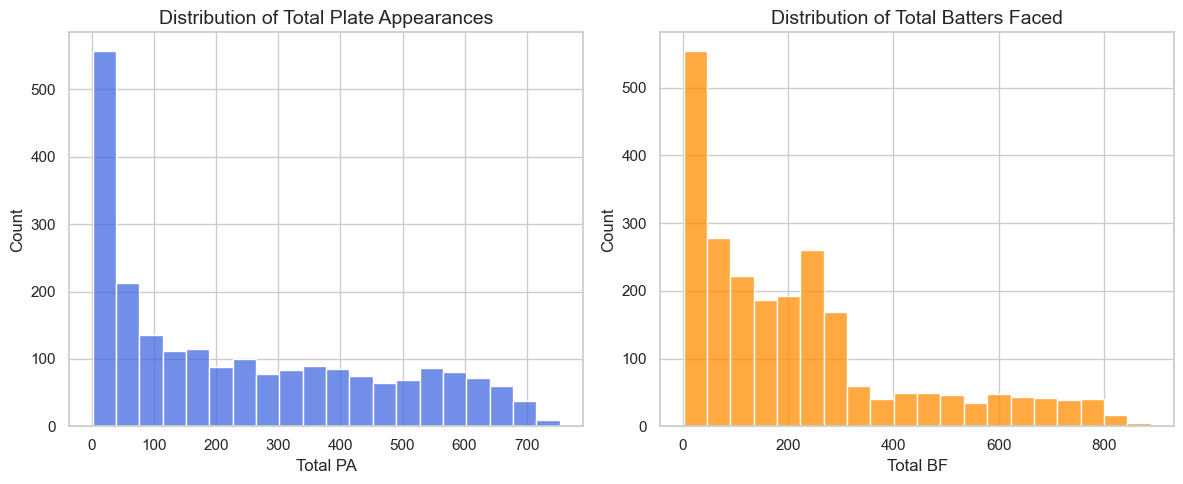

In [186]:
# Get dataframes where players had at least one pa or bf
df_players_with_pa = df_players[df_players['total_pa'] > 0]
df_players_with_bf = df_players[df_players['total_bf'] > 0]

# Create two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=100)

# Total plate appearances histogram
sns.histplot(df_players_with_pa['total_pa'], ax=axes[0], bins=20, color='royalblue')
axes[0].set_title('Distribution of Total Plate Appearances', fontsize=14)
axes[0].set_xlabel('Total PA', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Total batters faced histogram
sns.histplot(df_players_with_bf['total_bf'], ax=axes[1], bins=20, color='darkorange')
axes[1].set_title('Distribution of Total Batters Faced', fontsize=14)
axes[1].set_xlabel('Total BF', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

#plot
plt.tight_layout()
plt.savefig("pa_bf_distributions.jpg")
plt.show()

In [187]:
#function to create linear regressions
def linear_regression_scatter(df, x, y, min_x=False, min_y=False):
    
    #filter entries to where columns aren't null
    df = df[df[x].notnull() & df[y].notnull()]

    #filter out player who do not meet the min
    if min_x != False:
        df = df[df[x] >= min_x]
    
    if min_y != False:
        df = df[df[y] >= min_y]
    
    #get passed columns 
    x_vals = df[x]
    y_vals = df[y]
    
    #perform linear regression
    slope, intercept, r, p, std_err = stats.linregress(x_vals, y_vals)
    
    #define regression function
    def myfunc(x_vals):
        return slope * x_vals + intercept
    
    #generate regression line values
    mymodel = list(map(myfunc, x_vals))
    
    #create scatter plot with regression line
    plt.figure(figsize=(10, 6))  # Increase figure size for better readability
    sns.set_theme(style="whitegrid")  # Use a clean theme
    
    #scatter plot
    sns.scatterplot(x=x_vals, y=y_vals, color="blue", alpha=0.6, s=60, label="Player Data")
    
    #regression line
    plt.plot(x_vals, mymodel, color="red", linewidth=2, label=f"Regression Line (a: {slope:.2f}, b: {intercept:.2f}, R²={r**2:.2f})")
    
    #add text and plot
    plt.title(f"Relationship Between {x} and {y}", fontsize=16)
    plt.xlabel(f"{x}", fontsize=14)
    plt.ylabel(f"{y}", fontsize=14)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

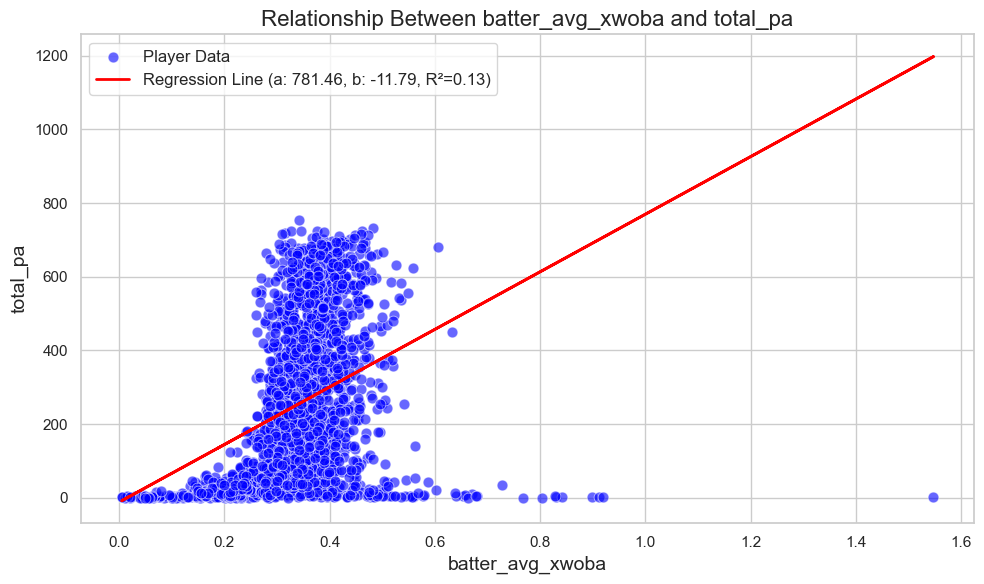

In [203]:
linear_regression_scatter(df_players,'batter_avg_xwoba','total_pa')

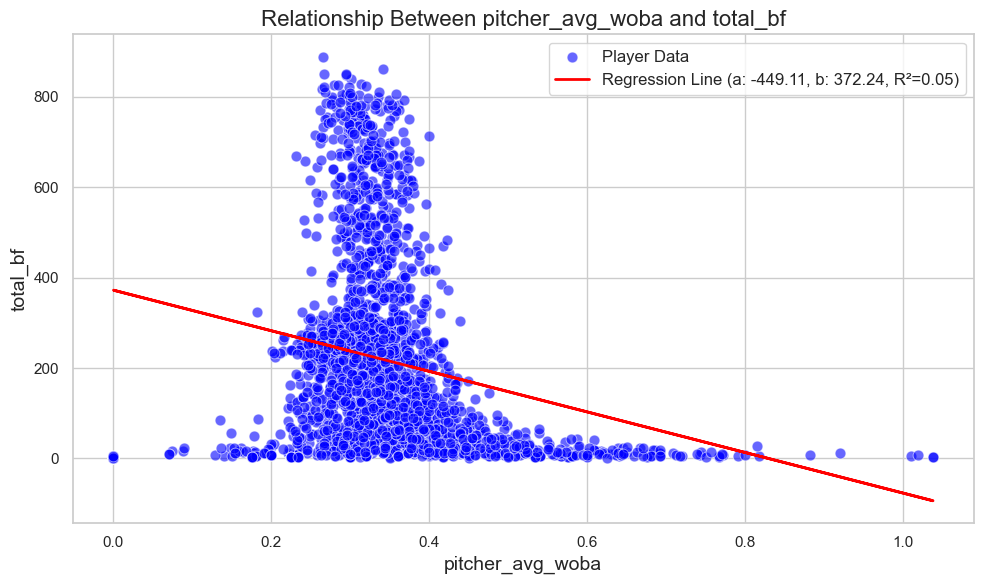

In [209]:
#bb rate good for pitchers
linear_regression_scatter(df_players,'pitcher_avg_woba','total_bf')

In [190]:
df_players.columns

Index(['Unnamed: 0', 'player_mlb_id', 'playerID_LAHMAN', 'birthYear',
       'birthMonth', 'birthDay', 'birthCountry', 'weight', 'height', 'bats',
       ...
       'batter_avg_xwoba', 'pitcher_avg_xwoba', 'primary_position', 'sp_pct',
       'starter', 'reliever', 'both_starter_reliever', 'age',
       'years_before_26', 'years_after_28'],
      dtype='object', length=188)